In [1]:

!pip install numpy
!pip install matplotlib

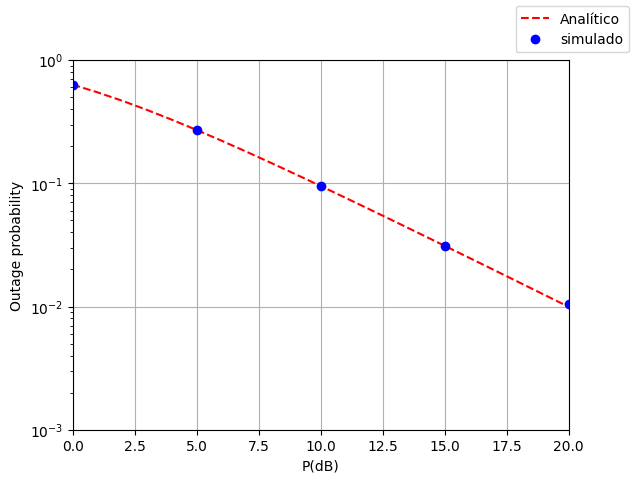

In [8]:
import numpy as np
import matplotlib.pyplot as plt


N=100000 #numero de amostras
d=1 #distancia
alpha1=4 #pathloss exponent
media=d**(-alpha1) #pathloss medio
lambda1=1/media


R=1 #taxa esperada
count=0
i=0
j=0
OP1=[]
N0=1 #densidade espectral da potência do Ruido
for j in np.arange(0,21,5): #Diferentes valores de potência em dB
    count=0
    plin=10**(j/10) #db para linear
    h =np.random.exponential(1/media,N) #|h|^2

    Prob1 = np.sum(np.log2(1 + (h* plin / N0)) < R) / N

    OP1=np.append(OP1,Prob1)




Pdb=np.arange(0,21,1)
Pdb2=np.arange(0,21,5)
plin=10**(Pdb/10)
outage=1-np.exp(-(2**R-1)*N0/(plin*media))
plt.semilogy(Pdb,outage,'r--')
plt.semilogy(Pdb2,OP1,'bo')

plt.grid()
plt.axis([0,20,1e-3,1])
plt.xlabel('P(dB)')
plt.ylabel('Outage probability')
plt.figlegend(['Analítico','simulado'])
plt.show()